**Data Processing and Analysis Notebook**

This notebook is bifurcated into two sections:

1.  The first section entails conducting an in-depth Exploratory Data Analysis (EDA) to gain insights into the underlying patterns and relationships within the data.

2.  The second section pertains to the preservation of processed data. This involves removing duplicated rows, deleting global outliers, and other such measures to ensure data integrity. The processed data is then saved to a separate CSV file, thus ensuring that the original data remains unaltered.

Import Libraries

In [3]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**PART 1: Exploratory Data Analysis (EDA)**

Import CSV data as Pandas DataFrame

In [ ]:
df = pd.read_csv(r"E:\NYC Taxi Trip Duration Prediction\data\raw.csv") # import dataset

**I. Data Overview**

a. Overview few Records

In [ ]:
print('Top 5 records from train dataset:\n', df.head())

Top 5 records from train dataset:
           id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  

b. Information about Dataset

In [ ]:
print('Information about train dataset:\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
Information about train dataset:
 None


Observations:

1.  Total columns: 11

2.  *`id`* feature identifies each row uniquely.

3.  *`trip_duration`* is the target variable.

4.  *`dropoff_datetime`*: It needs to be dropped, because if we have *`dropoff_datetime`* and *`pickup_datetime`*,  then *`trip_duration`* is merely the difference of the two.

5.  Feature data types automatically detected - object, float64, int64. These could be changed in case size is the issue e.g. if possible change float64 to float32, or object to categorical data type.


**II. Data Checks**

a. Check for Duplicated Data

In [ ]:
# ignore id column while checking duplicates as id is unique identifier
print('Number of duplicated rows:', df.loc[:, df.columns != 'id'].duplicated().sum())

Number of duplicated rows: 7


Obervations:

1.  7 duplicates found. This could cause data leak and needs to be deleted.

In [ ]:
# global outlier
# drop duplicates
print(f'Row count before performing action: {df.shape[0]}')
df = df.drop_duplicates(subset=df.loc[:, df.columns != 'id'])
print(f'Row count before performing action: {df.shape[0]}')

Row count before performing action: 1458644
Row count before performing action: 1458637


b. Check for Missing Values in Each Column

In [ ]:
print(f'Number of NaN values for each column:\n{df.isna().sum()}')

Number of NaN values for each column:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Observations:

1.  No missing values found. Therefore, no imputation required.

c. Check Number of Unique Values

In [ ]:
print(f'Number of unique values for each column:\n{df.nunique()}')

Number of unique values for each column:
id                    1458637
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64


d. Check Statistics for Numerical Features 

In [ ]:
print('Statistics for numerical columns:\n', df.describe())

Statistics for numerical columns:
           vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458637e+06     1.458637e+06      1.458637e+06     1.458637e+06   
mean   1.534948e+00     1.664525e+00     -7.397349e+01     4.075092e+01   
std    4.987773e-01     1.314242e+00      7.090187e-02     3.288107e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458637e+06      1.458637e+06   1.458637e+06  
mean       -7.397342e+01      4.075180e+01   9.594335e+02  
std         7.064342e-02      3.589055e-02   5.236970e+03  
min        -1.219333e+02      3.218114e+01   1.00

Observations:

1.  *`pickup_longitude`*,	*`pickup_latitude`*,	*`dropoff_longitude`*,	*`dropoff_latitude`*, and	*`trip_duration`* may have outliers (confirm through visualization).

e. Check Categories Present in the Different Categorical Columns

In [ ]:
print(f'Categories in passenger_count feature:\n{df.passenger_count.unique()}')

Categories in passenger_count feature:
[1 6 4 2 3 5 0 7 9 8]


Observations:

1.  Categories in passenger_count feature: [1 6 4 2 3 5 0 7 9 8]

2.  Min value of *`passenger_count`* is zero - These are outliers as with zero passengers it cannot be a taxi trip.

Delete these records.

In [ ]:
# global outlier
# delete rows with passenger_count equal to zero
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.passenger_count > 0)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458637
Row count after performing action: 1458577


In [ ]:
print(f'Categories in store_and_fwd_flag feature:\n{df.store_and_fwd_flag.unique()}')

Categories in store_and_fwd_flag feature:
['N' 'Y']


Obervsations:

1.  Categories in store_and_fwd_flag feature: ['N' 'Y']

In [ ]:
print(f'Categories in vendor_id feature:\n{df.vendor_id.unique()}')

Categories in vendor_id feature:
[2 1]


Obervsations:

1.  Categories in vendor_id feature: [1 2]

**III. Analyzing Features**

Analyzing features for outliers, skewness, imbalance, etc.

**Note: NYC location is at 40.7128° N, 74.0060° W (source: Google).**

a. Pickup Latitude & Pickup Longitude

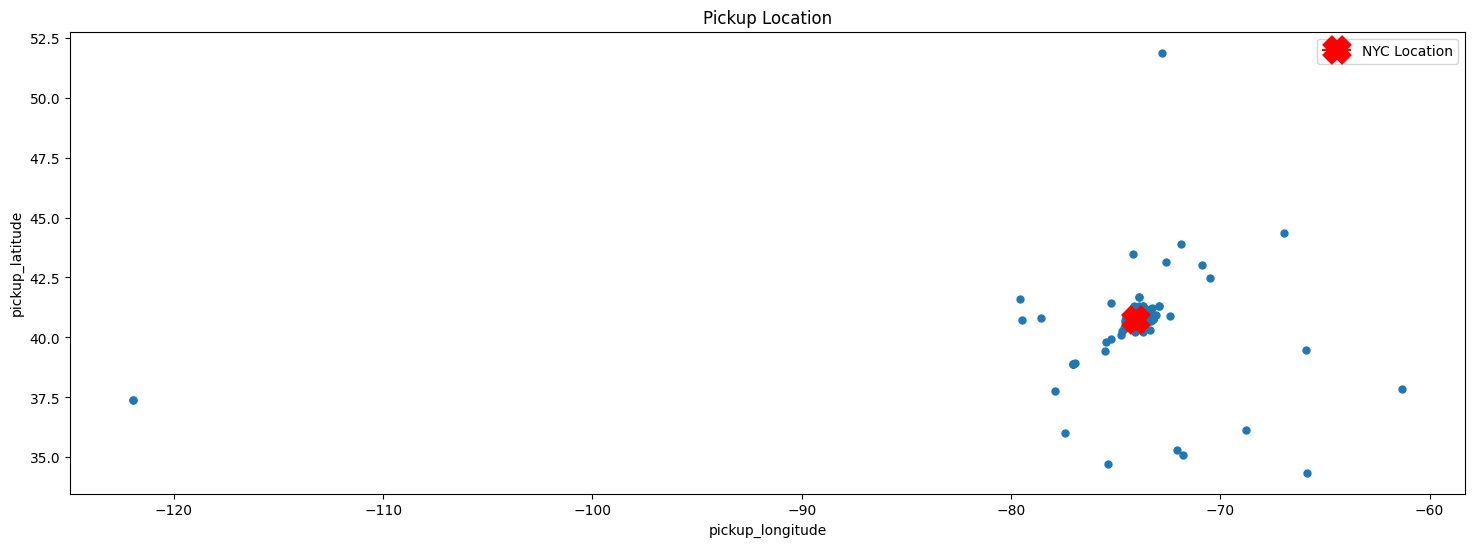

In [ ]:
# plot pickup location
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128, label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Pickup Location")
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.legend(loc="upper right")
plt.show()

Observations: 

Cluster isn't too packed, i.e., few points are little too far from the cluster. However, this may or may not be the outliers, because there could be few instances when ride locations are at far away distance.

(Global Outliers)
Remove the pickup locations are too far from the cluster. 



In [ ]:
# global outlier
# drop outliers
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.pickup_longitude > -100) & (df.pickup_latitude < 50)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458574
Row count after performing action: 1458574


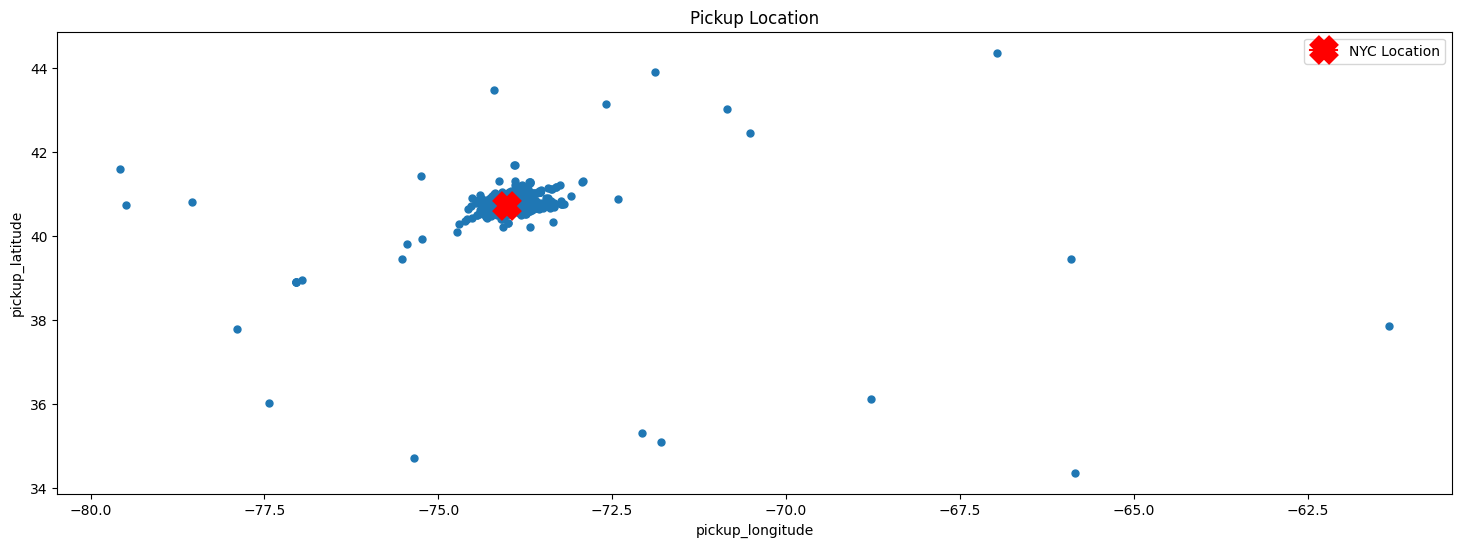

In [ ]:
# again plot pickup location
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128,  label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Pickup Location")
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.legend(loc="upper right")
plt.show()

Observations:

There are still few points that are away from the cluster. These could be outliers or could be few intracity trips.

(Global Outliers)
Assumming only intercity trips comprise the dataset, remove those outliers.

In [ ]:
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.pickup_longitude > -76) & (df.pickup_longitude < -72.5) &
                    (df.pickup_latitude > 39) & (df.pickup_latitude < 42)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458574
Row count after performing action: 1458550


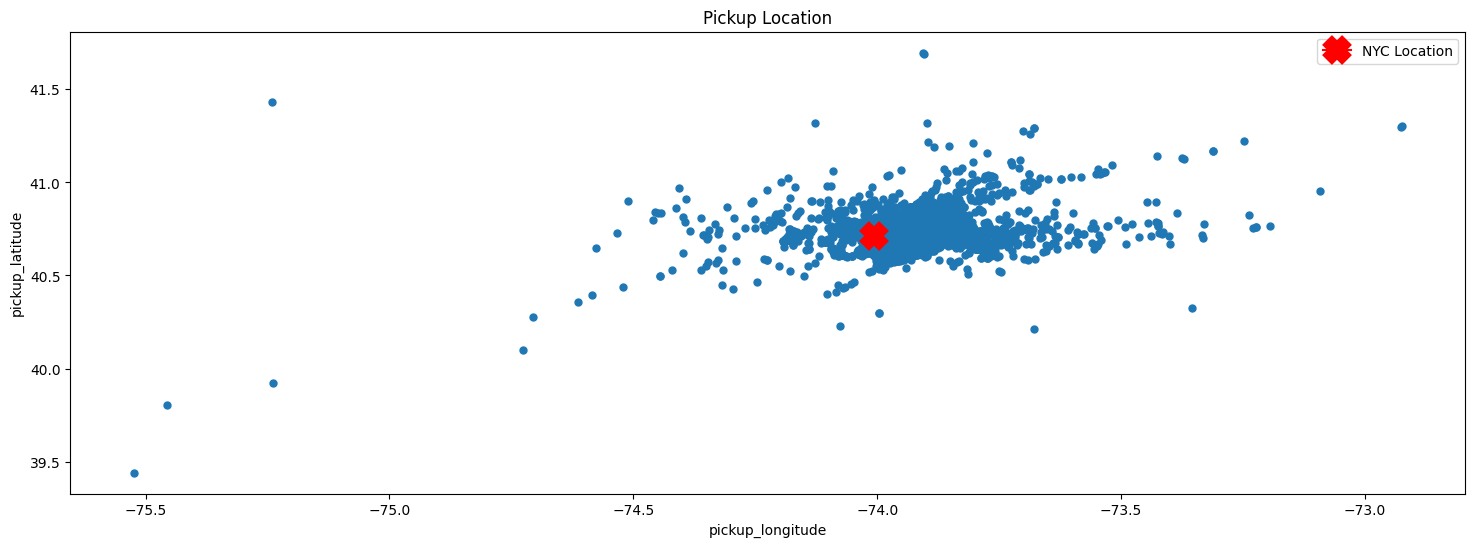

In [ ]:
# again plot pickup location
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128,  label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Pickup Location")
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.legend(loc="upper right")
plt.show()

Observations:

(Global Outliers)
Remove those four points with *`pickup_longitude`*<-75.

In [ ]:
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.pickup_longitude > -75)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458550
Row count after performing action: 1458546


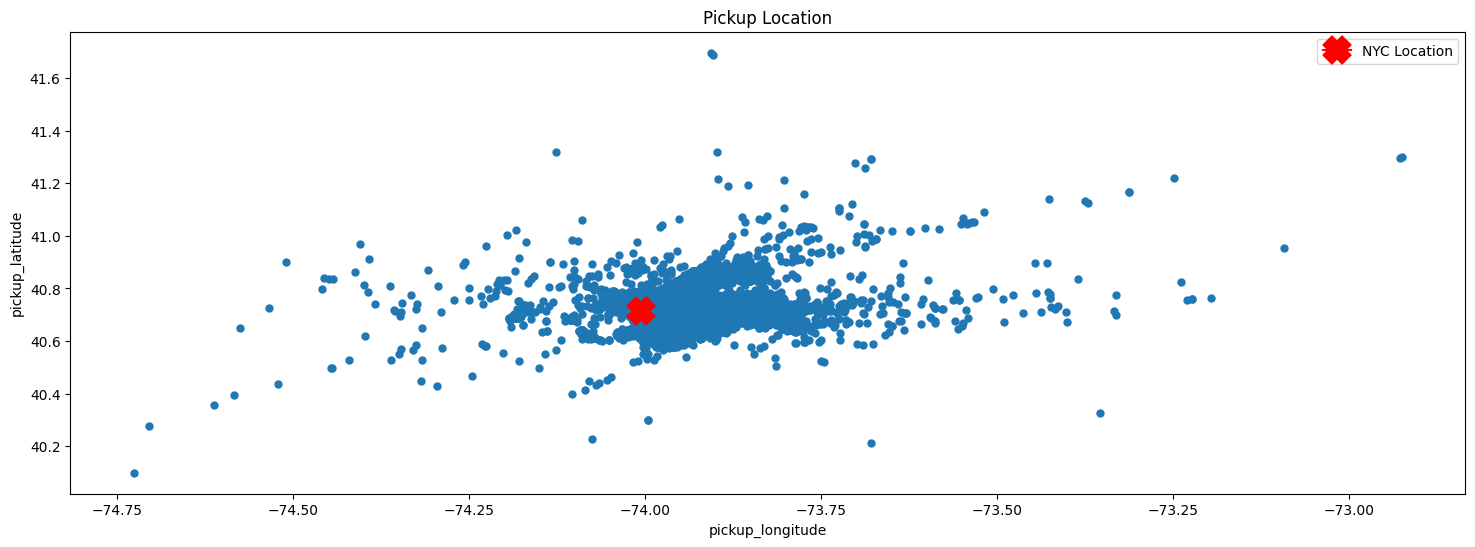

In [ ]:
# again plot pickup location
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128,  label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Pickup Location")
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.legend(loc="upper right")
plt.show()

Observations:

Pickup locations look to belong from the same cluster now.

b. Dropoff Latitude & Dropoff Longitude

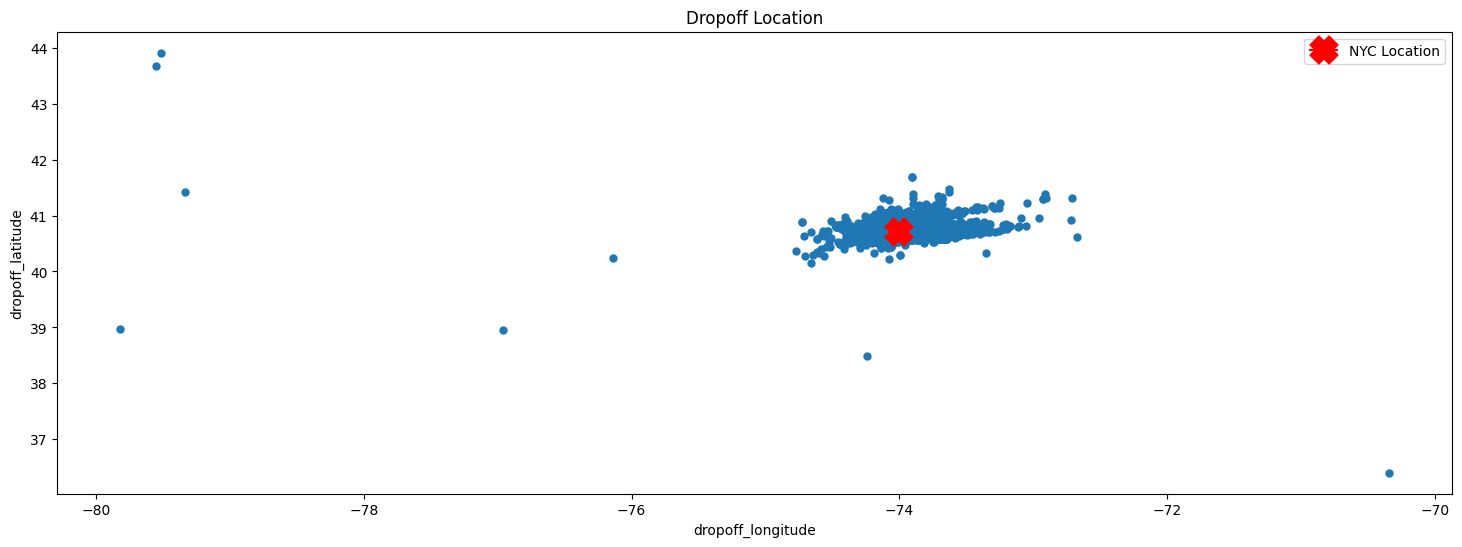

In [ ]:
# plot dropoff location
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128, label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Dropoff Location")
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.legend(loc="upper right")
plt.show()

Observations:
 
Similar to pickup locations, even in dropoff locations few points are away from the cluster. And similar to pickup locations, this could again may or may not be outliers and could be the real dropoff locations.

(Global Outliers)
Remove the points that are too away from the cluster.

In [ ]:
# drop outliers
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.dropoff_longitude > -75) & (df.dropoff_latitude > 39)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458546
Row count after performing action: 1458538


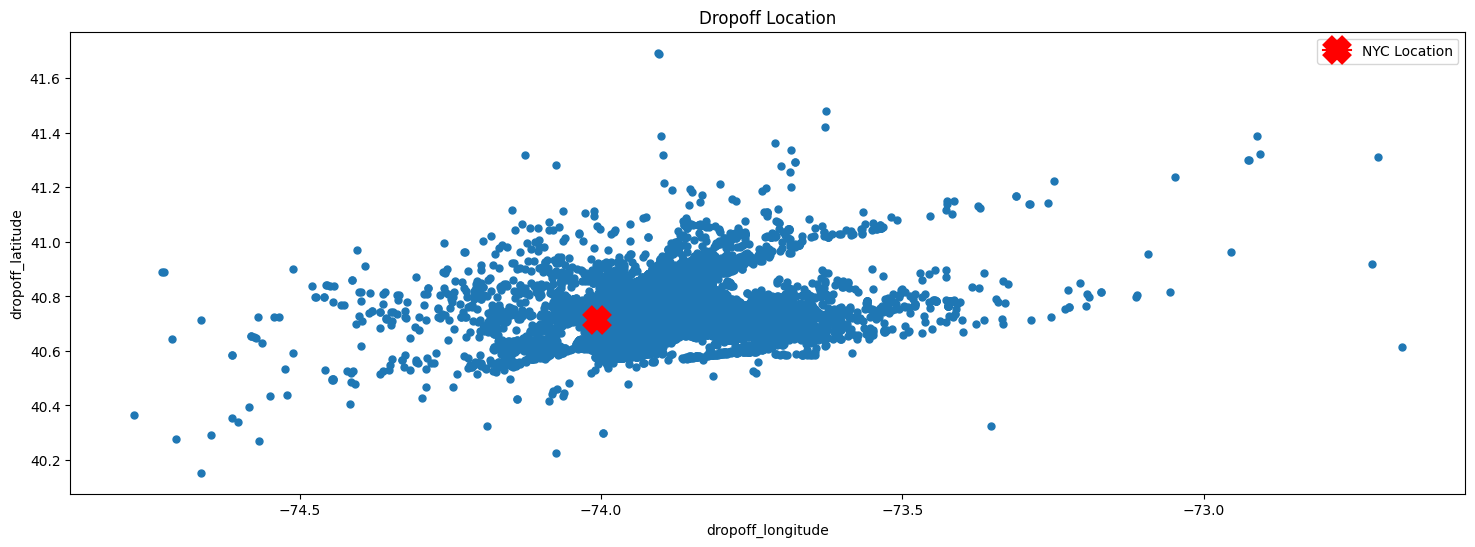

In [ ]:
# again plot dropoff location
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', markersize=10)
plt.plot(-74.0060, 40.7128, label='NYC Location', marker='x', color='red', markersize=15, mew=10)
plt.title("Dropoff Location")
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.legend(loc="upper right")
plt.show()

Observations: 

There are still few points away from the cluster. Let's keep them now.

c. Trip Duration

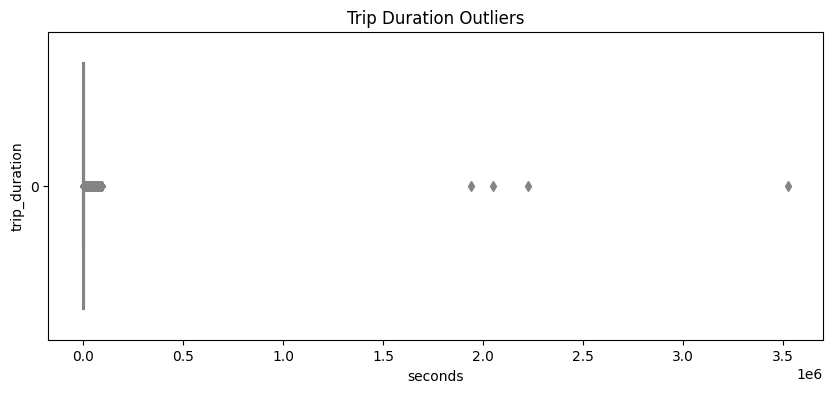

In [ ]:
# plot trip duration using box plot
fig = plt.figure(figsize=(10,4))
sns.boxplot(df.trip_duration, orient="h", palette='coolwarm')
plt.title('Trip Duration Outliers')
plt.ylabel('trip_duration')
plt.xlabel('seconds')
plt.show()

Observations:

4 points that are far away from the cluster, and rest of the points are near the cluster.

(Global Outliers)
Remove these 4 points.

In [ ]:
# drop outliers
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.trip_duration < 500000)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458538
Row count after performing action: 1458534


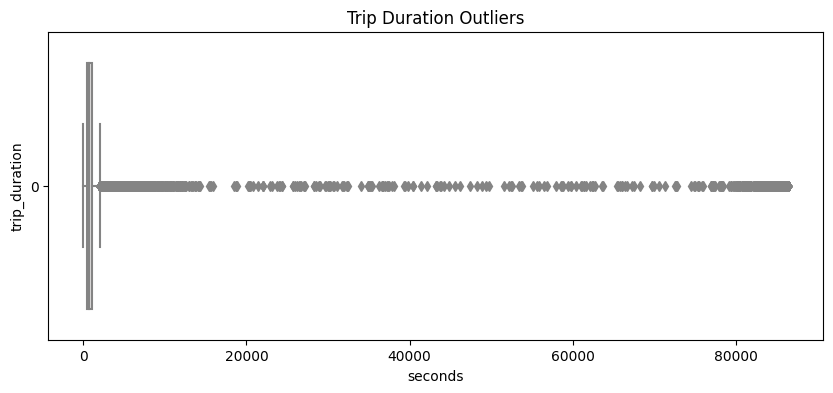

In [ ]:
# again plot trip duration using box plot
fig = plt.figure(figsize=(10,4))
sns.boxplot(df.trip_duration, orient="h", palette='coolwarm')
plt.title('Trip Duration Outliers')
plt.ylabel('trip_duration')
plt.xlabel('seconds')
plt.show()

Observations:

This is a right skewed feature. Too many points outside the box. These points could be outliers, however, on rare occasions, *`trip_duration`* could really exceed.

Plotting a histogram to verify if the feature is right skewed.

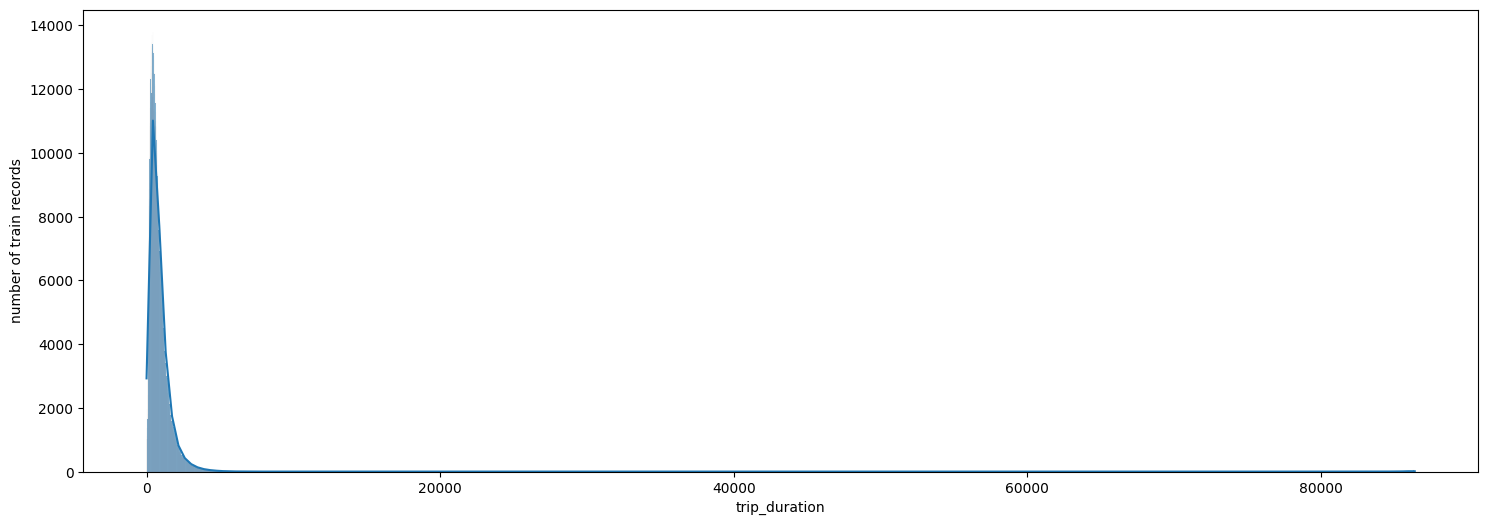

In [ ]:
# plot histogram for skewness detection
plt.subplots(figsize=(18,6))
sns.histplot(data=df, x='trip_duration', kde=True, bins=10000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Observations:

The target variable, i.e., *`trip_duration`*, is indeed right skewed. This gives us two options:

*   Either perform log-transformation
*   Or use proper metric for evaluation

Certain trips have *`trip_duration`* equal to 1 second, 2 seconds, 4 seconds, etc. and certain distance travelled.

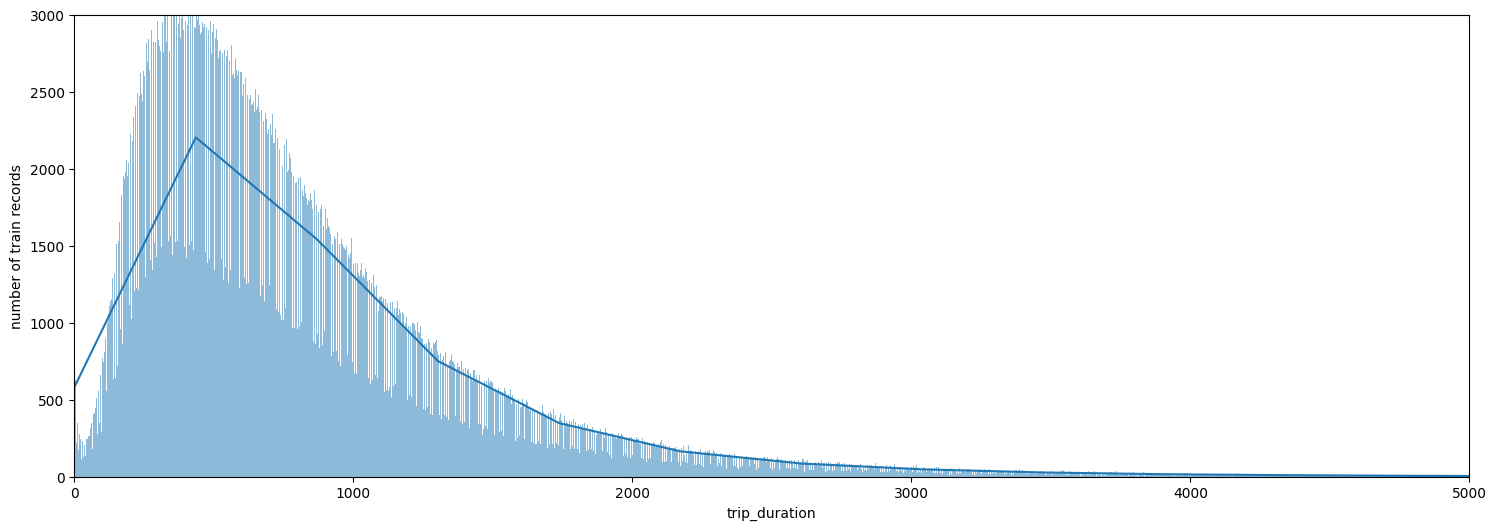

In [ ]:
# zoom the above histogram on the left part
plt.subplots(figsize=(18,6))
sns.histplot(data=df,x='trip_duration', kde=True, bins=50000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.axis([0, 5000, 0, 3000]) # zooming co-ordinates
plt.show()

Observations:

There are points with *`trip_duration`* of few seconds as well. These may or may not be outliers.

d. Vendor ID

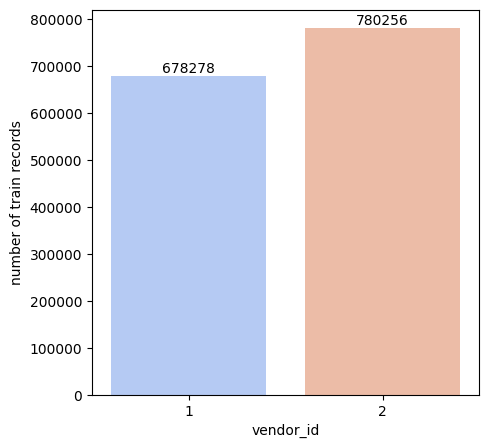

In [ ]:
# plot countplot
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=df['vendor_id'], data=df, palette='coolwarm', ax=ax)
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)
plt.xlabel('vendor_id')
plt.ylabel('number of train records')
plt.show()

Observations:

1.  Two vendors: *`vendor_id`* 1 and *`vendor_id`* 2

2.  Distribution of training records - 

    *   *`vendor_id`* 1 having 678278 training records

    *   *`vendor_id`* 2 having 780263 training records

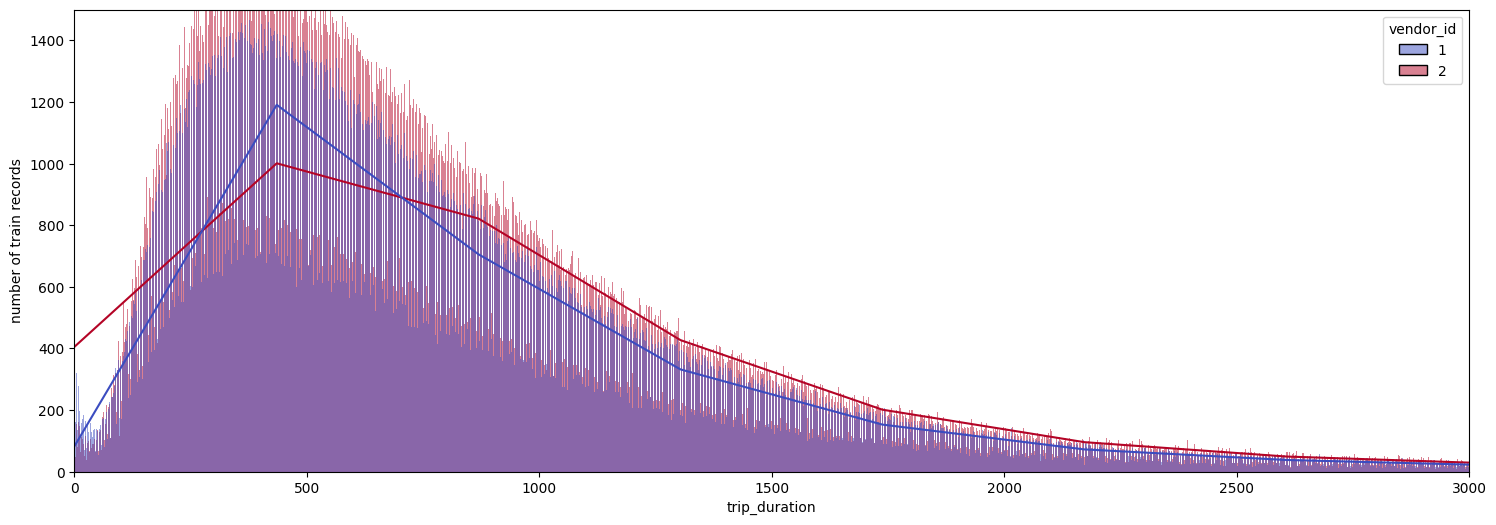

In [ ]:
# plot zoomed histplot
plt.subplots(figsize=(18,6))
sns.histplot(data=df, x='trip_duration', palette='coolwarm', kde=True, hue='vendor_id', bins=50000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.axis([0, 3000, 0, 1500]) # zooming co-ordinates
plt.show()

Observations:

Almost equal distribution of *`trip_duration`* per *`vendor_id`*.

e. Store and Forward Flag

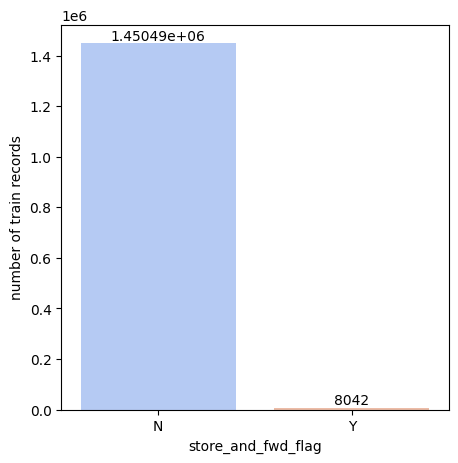

In [ ]:
# plot countplot
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=df['store_and_fwd_flag'], data=df, palette='coolwarm', ax=ax)
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('number of train records')
plt.show()

Observations:

1.  *`store_and_fwd_flag`* has two values: N and Y

2.  This feature is highly imbalanced with majority of records having value N.

2.  Distribution of training records with value - 

    *   N having 1450500 training records

    *   Y having 8042 training records

f. Passenger Count

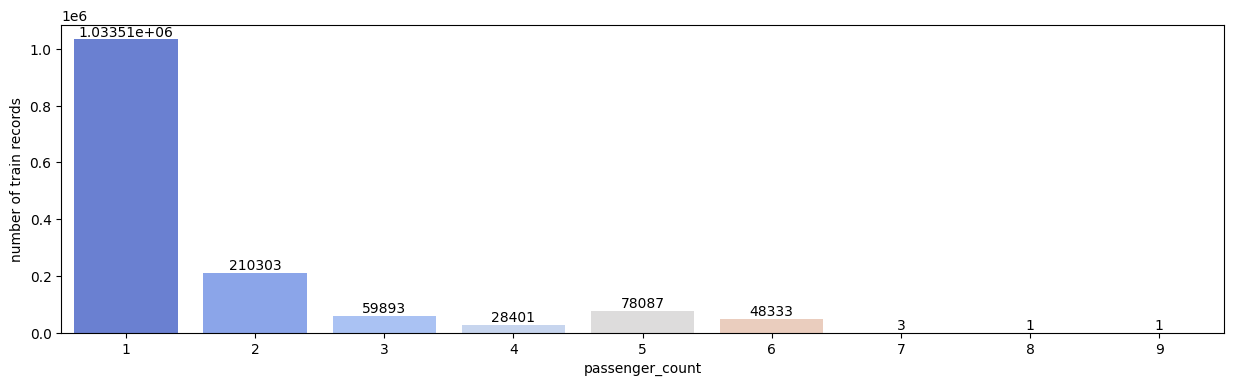

In [ ]:
# plot countplot
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(x=df['passenger_count'], data=df, palette='coolwarm', ax=ax)
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)
plt.xlabel('passenger_count')
plt.ylabel('number of train records')
plt.show()

Observations:

1.  Majority of times a taxi is taken by when *`passenger_count`* is 1.

2.  *`passenger_count`* distribution - 

    *   1: total training records count is 1033510

    *   2: total training records count is 210303

    *   3: total training records count is 59893

    *   4: total training records count is 28401

    *   5: total training records count is 78087

    *   6: total training records count is 48333

    *   7: total training records count is 3

    *   8: total training records count is 1

    *   9: total training records count is 1

(Global Outliers)
Drop records with *`passenger_count`* 7, 8, and 9, because these look like rare instances and could mess up with the model performance. A normal taxi doesn't accomodate more than 6 passengers.

In [ ]:
# drop records with passenger_count>6
print(f'Row count before performing action: {df.shape[0]}')
df = df[(df.passenger_count < 7)]
print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458534
Row count after performing action: 1458529


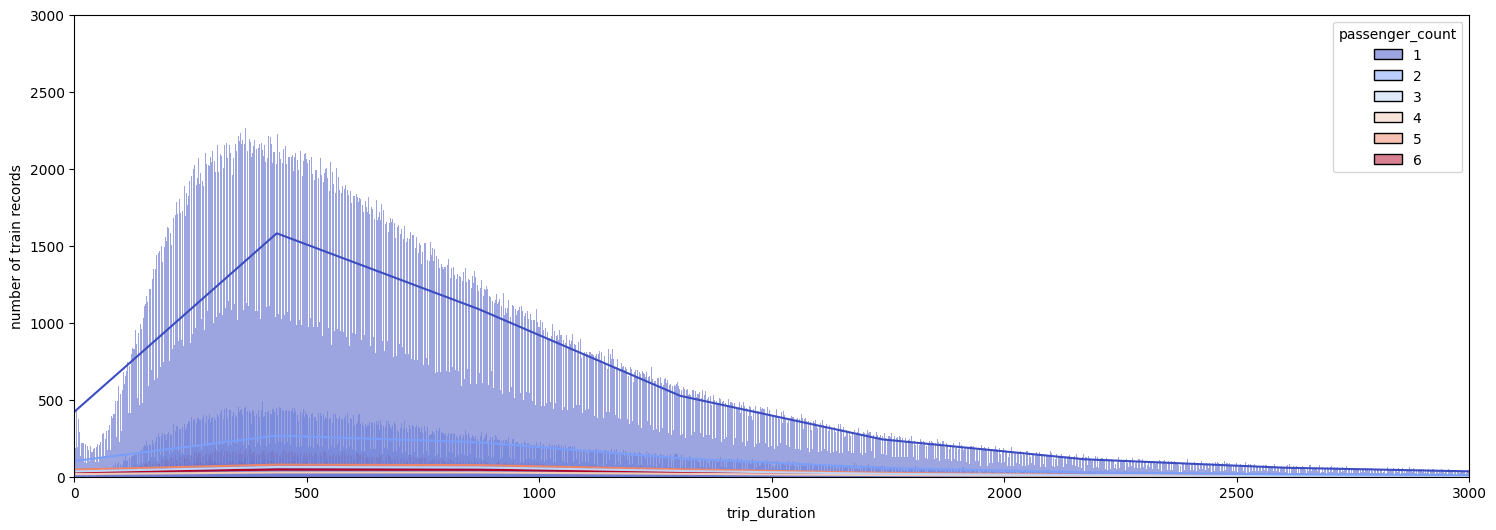

In [ ]:
# plot zoomed histplot
plt.subplots(figsize=(18,6))
sns.histplot(data=df, x='trip_duration', palette='coolwarm', kde=True, hue='passenger_count', bins=50000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.axis([0, 3000, 0, 3000]) # zooming co-ordinates
plt.show()

Observations:

When *`passenger_count`* is more than 1, then almost uniform distribution of *`trip_duration`*.

Plot another histogram with *`passenger_count`* equal to 1, and *`passenger_count`* more than 1 to get clear picture.

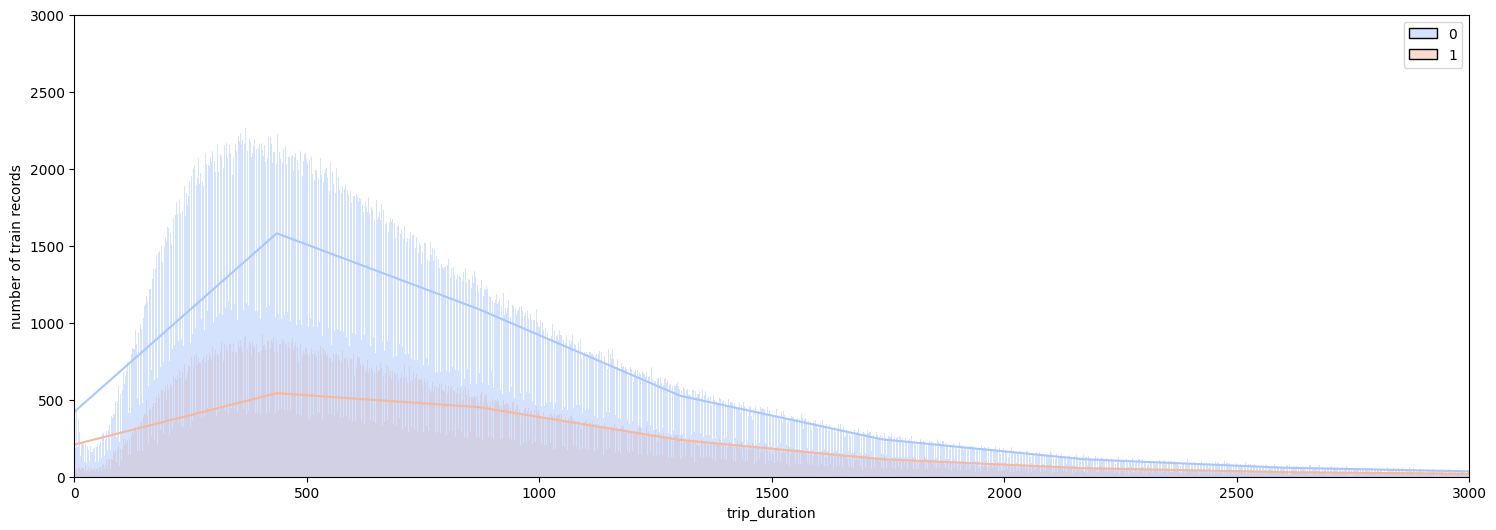

In [ ]:
# plot zoomed histplot
plt.subplots(figsize=(18,6))
passenger_count_df = np.where(df['passenger_count']>1, 1, 0)
sns.histplot(data=df, x='trip_duration', palette='coolwarm', kde=True, hue=passenger_count_df, bins=50000)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.axis([0, 3000, 0, 3000]) # zooming co-ordinates
plt.show()

Observations:

Even with *`passenger_count`* > 1, the distribution looks right skewed.

Plot median *`trip_duration`* for taxi's with each *`passenger_count`*.

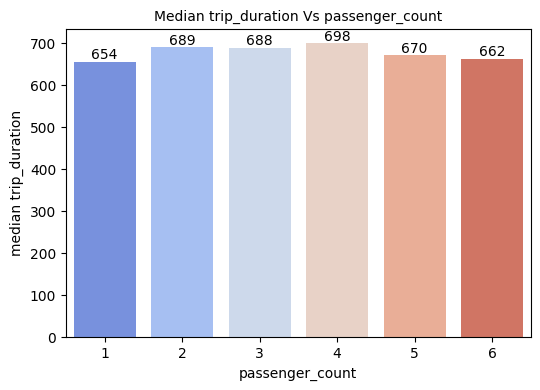

In [ ]:
# plot passenger_count Vs median trip duration
grouped_passenger_count_df = df.groupby('passenger_count')

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=grouped_passenger_count_df['trip_duration'].median().index, 
            y=grouped_passenger_count_df['trip_duration'].median().values, palette='coolwarm', ax=ax)
ax.set_title('Median trip_duration Vs passenger_count', color='black', size=10)
plt.xlabel('passenger_count')
plt.ylabel('median trip_duration')
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)

Observations:

Median *`trip_duration`* is almost same for taxi's with each *`passenger_count`*.

g. DataTime

In [ ]:
# convert to datetime object
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

print(f'Start DateTime: {min(df.pickup_datetime)}')
print(f'End DateTime: {max(df.pickup_datetime)}')

Start DateTime: 2016-01-01 00:00:17
End DateTime: 2016-06-30 23:59:39


Observations:

The dataset is from first 6 months of 2016.

> Essential to do 'TimeSeries' split instead of random train_test_split.



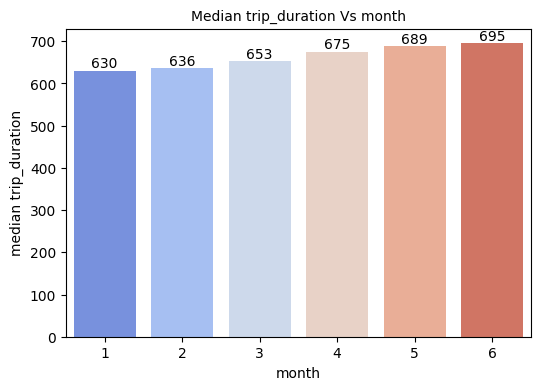

In [ ]:
# plot month Vs median trip duration
grouped_month_df = df.groupby(df.pickup_datetime.dt.month)

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=grouped_month_df['trip_duration'].median().index, 
            y=grouped_month_df['trip_duration'].median().values, palette='coolwarm', ax=ax)
ax.set_title('Median trip_duration Vs month', color='black', size=10)
plt.xlabel('month')
plt.ylabel('median trip_duration')
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)

Observations:

Median *`trip_duration`* is almost same in all the six months.

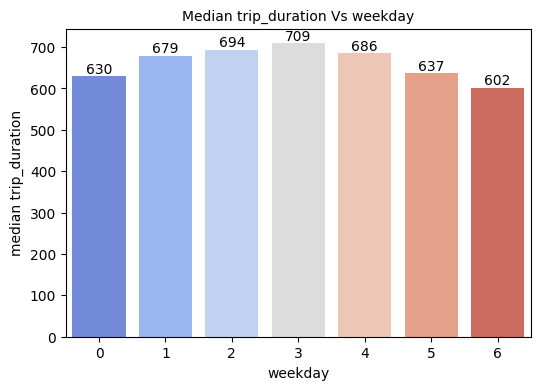

In [ ]:
# plot weekday Vs median trip duration
grouped_weekday_df = df.groupby(df.pickup_datetime.dt.weekday)

fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=grouped_weekday_df['trip_duration'].median().index, 
            y=grouped_weekday_df['trip_duration'].median().values, palette='coolwarm', ax=ax)
ax.set_title('Median trip_duration Vs weekday', color='black', size=10)
plt.xlabel('weekday')
plt.ylabel('median trip_duration')
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)

Observations:

Note: Monday starts from 0 in pandas.

Little variation in median *`trip_duration`* at each day of the week.

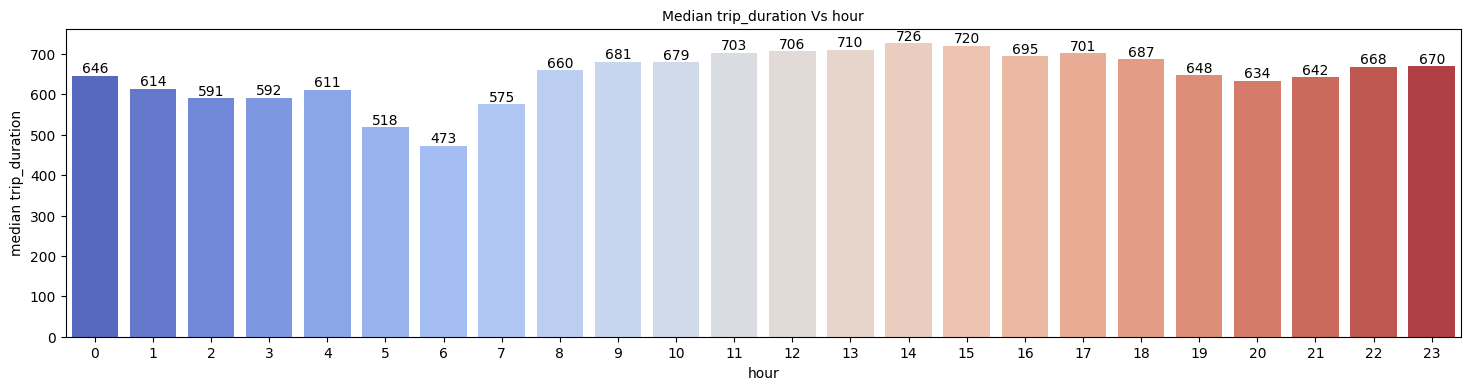

In [ ]:
# plot hour Vs median trip duration
grouped_hour_df = df.groupby(df.pickup_datetime.dt.hour)

fig,ax = plt.subplots(figsize=(18,4))
sns.barplot(x=grouped_hour_df['trip_duration'].median().index, 
            y=grouped_hour_df['trip_duration'].median().values, palette='coolwarm', ax=ax)
ax.set_title('Median trip_duration Vs hour', color='black', size=10)
plt.xlabel('hour')
plt.ylabel('median trip_duration')
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)

Observations:

From hour 2 to hour 7, *`trip_duration`* required is less. This could be due to the fact that traffic is minimum from hour 2 to hour 7 which is the night time. 

Divide the hours from hour 2 to 7 & rest of the hours into two categories, and check it's impact on median *`trip_duration`*

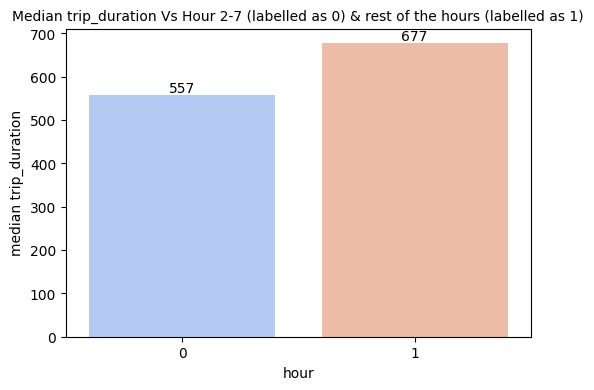

In [ ]:
# plot hour 2-7 & rest of the hours Vs median trip duration
hour_before7_after7_df = np.where((df.pickup_datetime.dt.hour == 0) | 
                                  (df.pickup_datetime.dt.hour == 1) | 
                                  (df.pickup_datetime.dt.hour > 7), 1, 0)

grouped_hour_before7_after7_df = df.groupby(hour_before7_after7_df)
print(grouped_hour_before7_after7_df)
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(x=grouped_hour_before7_after7_df['trip_duration'].median().index, 
            y=grouped_hour_before7_after7_df['trip_duration'].median().values, palette='coolwarm', ax=ax)
ax.set_title('Median trip_duration Vs Hour 2-7 (labelled as 0) & rest of the hours (labelled as 1)', color='black', size=10)
plt.xlabel('hour')
plt.ylabel('median trip_duration')
for container in ax.containers:
    ax.bar_label(container, color='black', size=10)

Observations:

Difference between the median *`trip_duration`* from hour 2 to 7 and rest of the hours.

**PART 2: Preservation of Processed Data**

1.   Drop duplicated rows. 

2.   Delete rows with *`passenger_count`* equal to zero and more than six.

3.   Delete global outliers from pickup location, dropoff location and trip duration.

4.   Drop column *`droppoff_datetime`*.

In [4]:
df = pd.read_csv("raw.csv") # import dataset

In [5]:
print(f'Row count before performing action: {df.shape[0]}')

# drop duplicated rows
df = df.drop_duplicates(subset=df.loc[:, df.columns != 'id'])
# drop rows with passenger_count equal to zero
df = df[(df.passenger_count > 0) & (df.passenger_count < 7)]
# drop global outliers from pickup location 
df = df[(df.pickup_longitude > -75) & (df.pickup_longitude < -72.5) &
                    (df.pickup_latitude > 39) & (df.pickup_latitude < 42)]
# drop global outliers from dropoff location                   
df = df[(df.dropoff_longitude > -75) & (df.dropoff_latitude > 39)]
# drop global outliers from trip duration
df = df[(df.trip_duration < 500000)]
# drop column droppoff_datetime
df = df.drop(columns=['dropoff_datetime'])

print(f'Row count after performing action: {df.shape[0]}')

Row count before performing action: 1458644
Row count after performing action: 1458529


In [6]:
df.to_csv('data/processed.csv', index=False) # save processed df to .csv